In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf

In [8]:
data = pd.read_csv('C:\\Users\\Kostas\\Desktop\\MSc Cloud Computing\\3rd Block - Weeks 13-16\\Machine Learning\\OK solution\\train.csv')


In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data['Survived'].mean()

0.3838383838383838

In [14]:
data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [15]:
class_sex_grouping = data.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

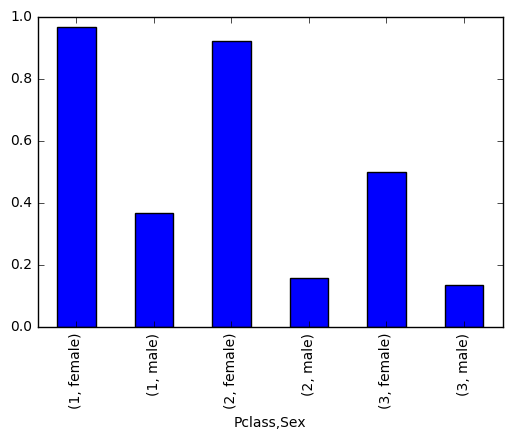

In [17]:
class_sex_grouping['Survived'].plot.bar()

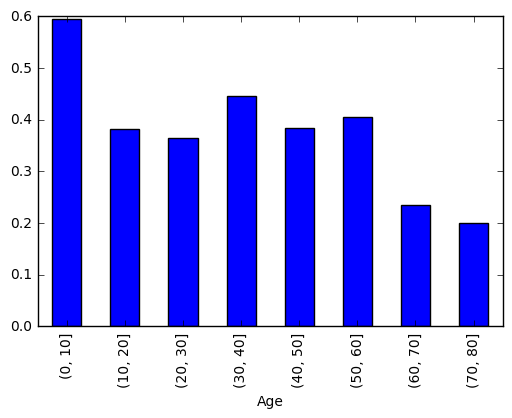

In [18]:
group_by_age = pd.cut(data["Age"], np.arange(0, 90, 10))
age_grouping = data.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

In [19]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [52]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('C:/Users/Kostas/Desktop/MSc Cloud Computing/3rd Block - Weeks 13-16/Machine Learning/OK solution/train.csv')
    
    # reading test data
    test = pd.read_csv('C:/Users/Kostas/Desktop/MSc Cloud Computing/3rd Block - Weeks 13-16/Machine Learning/OK solution/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined

In [53]:
combined = get_combined_data()

In [54]:
combined.shape

(1309, 11)

In [23]:
data = data.drop(['Age','Cabin','Embarked'], axis=1)

In [27]:
data["SibSp"] = data["SibSp"].fillna("NA")

In [28]:
data = data.dropna()

In [29]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
SibSp          891
Parch          891
Ticket         891
Fare           891
dtype: int64

In [36]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Pclass = le.fit_transform(processed_df.Pclass)
    processed_df = processed_df.drop(['Name','Ticket','SibSp'],axis=1)
    return processed_df

In [37]:
processed_df = preprocess_titanic_df(data)

In [38]:
X = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values

In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [40]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [41]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.75418994413407825

In [42]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [43]:
test_classifier(clf_dt)

Accuracy: 0.7721 (+/- 0.03)


In [44]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.8081 (+/- 0.02)


In [45]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8159 (+/- 0.03)


In [46]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.8162 (+/- 0.03)


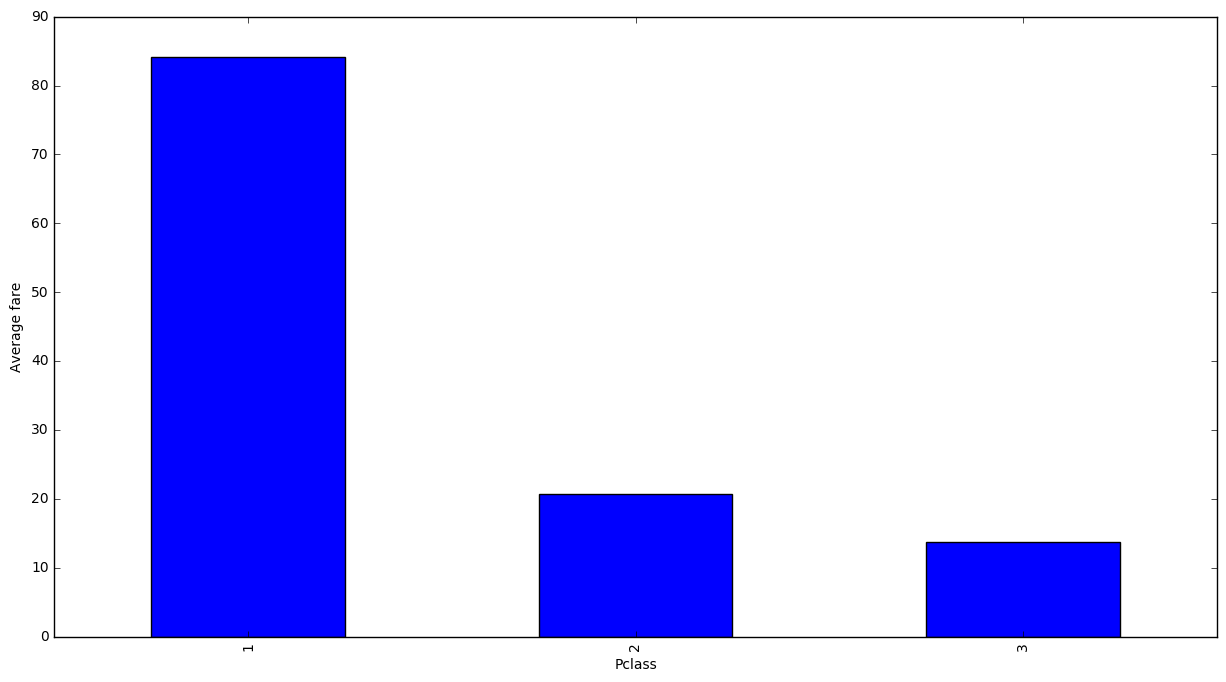

In [48]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)